# MVP Sprint Engenharia de Dados

## Aluno: Paulo Vitor Lima Souza

## 1. Definição do Problema

O dataset utilizado neste projeto será correlacionado à base de dados do **IMDb Data Files**. Trata-se de subconjuntos de dados do IMDb disponíveis para acesso para uso pessoal e não comercial.

Cada conjunto de dados é disponibilizado em arquivos formatado em TSV (valores separados por tabulação) compactados no conjunto de caracteres UTF-8. A primeira linha em cada arquivo contém cabeçalhos que descrevem o que está em cada coluna. Um '\N' é usado para denotar que um determinado campo está ausente ou nulo para esse título/nome.

A base de dados diponibilizada como um todo, apresenta dados descritivos de filmes/séries, atores que atuaram nos filmes, avaliações, diretores, demais elencos e dados técnicos dos filmes como mídia e local de lançamento.

Analisando os dados disponibilizados, almeja-se identificar:

1.   As 25 séries que apresentaram maior avaliação em algum episódio e que possuiram mais de 20.000 votos nessas avaliações.
2.   Para a série de comédia *Friends* de 1994, elencar os 10 melhores episódios conforme avaliação dos usuários. Ou seja, os 10 episódios com melhor avaliação da série.

Os dados para essas análises são disponibilizados em três conjuntos distintos: dados do título, dados de episódio e dados de avaliação do título. Existem títulos que não são associados à séries (como filmes) e existem títulos que não possuem avaliações.

Os dados para o presente trabalho foram coletados do repositório em núvem do IMDb. Os dados foram carregados conforme esquema em tabelas de banco de dados em nuvem em esquema estrela na Plataforma Databricks (https://community.cloud.databricks.com/).

A modelagem de dados, carga, transformação de dados, bem como os resultados obtidos de forma a identicar e responder os dois objetivos de verificação do presente trabalho são dipostos nas próximas sessões.

---

Dataset obtido em: https://datasets.imdbws.com/




## 2. Modelagem de Dados

Foram utilizadas do **IMDb Data Files** três conjuntos de dados: title.basics.tsv.gz; title.episode.tsv.gz; title.ratings.tsv.gz. A descrição dos atributos e a modelagem para *Data Warehouse* são dispostos a seguir:


---


**Tabela**: title.basics.tsv.gz

Descrição: Armazena todos os detalhes sobre os títulos (séries, filmes, episódios, etc.).

-

**Colunas**:

*   **tconst** (VARCHAR) - Identificador único alfanumérico do título (**chave
primária**). --> Não NULO.

*   **titleType** (VARCHAR) - Tipo/formato do título (movie, tvseries, etc.). --> Não NULO

*   **primaryTitle** (VARCHAR) - Título mais popular / o título usado pelos cineastas em materiais promocionais no lançamento --> Não NULO

*   **originalTitle** (VARCHAR) - Título original no idioma original. --> Não NULO

*   **isAdult** (BOOLEAN) - 0 para não adulto, 1 para adulto. --> Permite NULO

*   **startYear** (VARCHAR) - Ano de lançamento (ou início, no caso de séries). --> Permite NULO

*   **endYear** (VARCHAR) - Ano de término (para séries). NULL para outros tipos de título. --> Permite NULO

*  **runtimeMinutes** (INT) - Duração principal do título, em minutos. --> Permite NULO

*   **genres** (VARCHAR) - Gêneros associados ao título, separados por vírgulas (por exemplo, "Drama,Action"). --> Permite NULO

**Observações**


1.   Chave Primária: tconst garante que cada título seja único na tabela.

---
**Tabela**: title.episode.tsv.gzz

Descrição: Contém detalhes sobre os episódios e seus relacionamentos com as séries principais.

-

**Colunas**:

*   **tconst** (VARCHAR) - Identificador único alfanumérico do título (**chave
primária**). --> Não NULO.

*   **parentTconst** (VARCHAR): Identificador único e alfanumérico da série principal à qual o episódio pertence. **Chave estrangeira** para a tabela title.basics.tsv. --> Não NULO

*   **seasonNumber** (INT): Número da temporada à qual o episódio pertence. --> Permite NULO

*   **episodeNumber** (INTEGER): Número do episódio na temporada. --> Permite NULO

**Observações**


1.   Chave Primária: tconst garante que cada episódio seja único na tabela. Relaciona-se por integridade a title.basics.tsv.gz.
2.   Relacionamento: O uso de FOREIGN KEY em parentTconst permite vincular episódios às suas séries principais. Relaciona-se a title.basics.tsv.gz.

---
**Tabela**: title.ratings.tsv.gz

Descrição: Armazena as avaliações dos títulos, incluindo a média ponderada das classificações e o número de votos recebidos.

-

**Colunas**:

*   **tconst** (VARCHAR) - Identificador único alfanumérico do título (**chave
primária**). --> Não NULO.

*   **averageRating** (DECIMAL): Média ponderada das classificações dos usuários --> Não NULO

*  **numVotes** (INT): Número total de votos recebidos pelo título. --> Não NULO

**Observações**


1.   Chave Primária: tconst garante que cada episódio seja único na tabela. Relaciona-se por integridade a title.basics.tsv.gz.
2.   O campo averageRating utiliza o tipo DECIMAL(3, 1) para armazenar valores como 8.7 com uma casa decimal.
---

## 3. Carga de Dados

Utilizou-se o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv disponível online. O arquivo possui cabeçalho de dados.

Utilizou-se a estratégia de carregar os dados conforme arquivo segmentado de texto, atribuindo-o a um data set e posteriormente atribuindo a uma tabela de dados na Plataforma Databricks.

As tabelas originais da modelagem de dados foram atribuídas a um *dataset* correspondente.

*   Dados: title.basics.tsv.gz --> Dataset: title_basics_df
*   Dados: title.episode.tsv.gzz --> Dataset: title_episode_df
*   Dados: title.ratings.tsv.gz --> Dataset: title_ratings_df


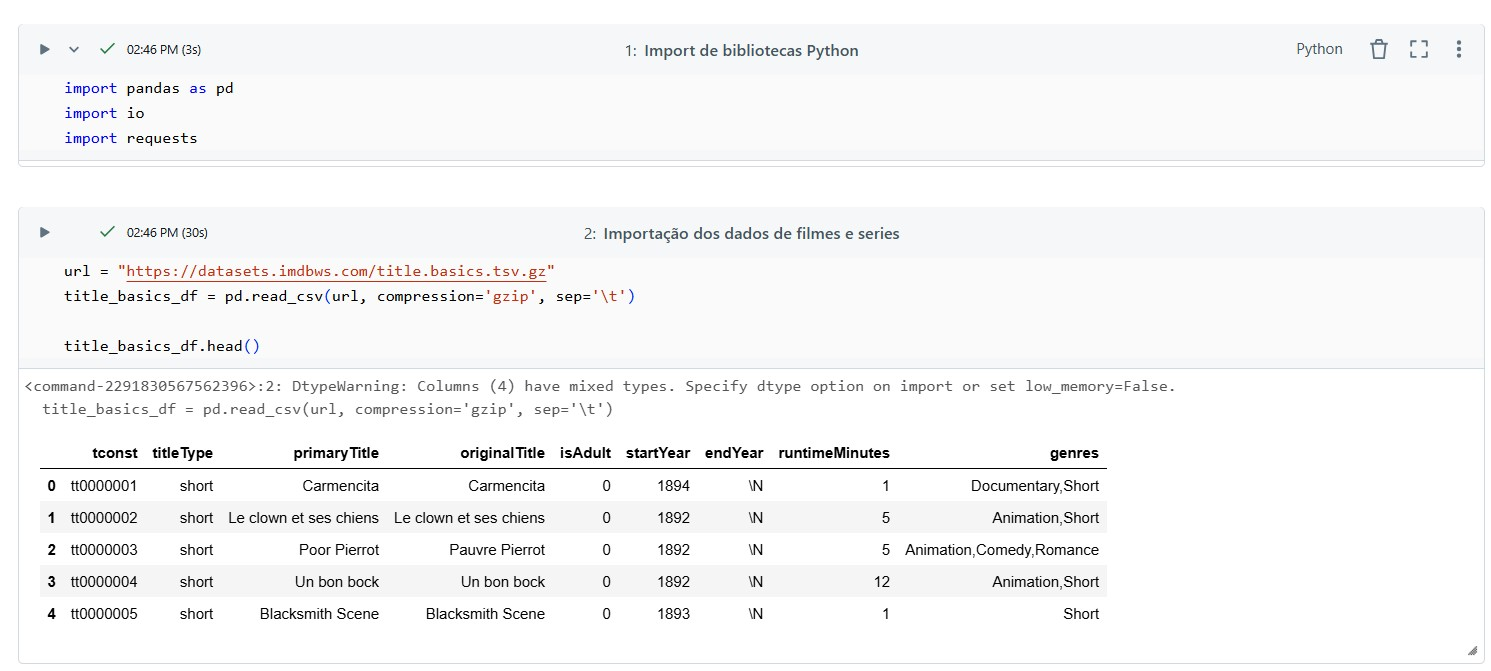


Figura 01 - Import de bibliotecas e dados dos títulos do catálogo de filmes/séries usando pandas.

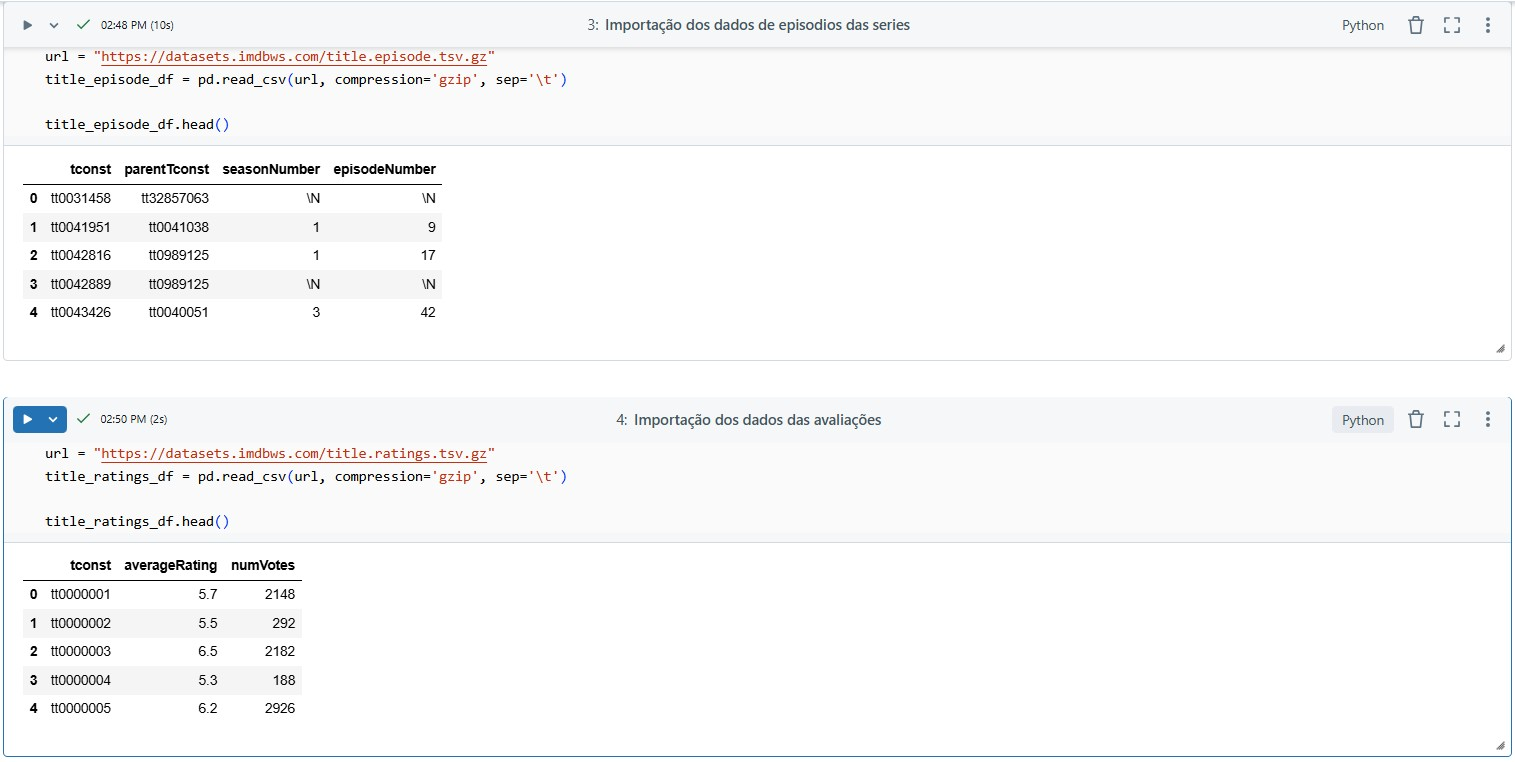

Figura 02 - Import de dados de episódios e rating de títulos usando pandas.


As tabelas originais da modelagem de dados foram atribuídas a um conjunto de dados denominado bronze, sem manipulações, utilizando sparks.

*   Dados: title.basics.tsv.gz --> Dataset: title_basics_df --> Tabela: bronze.title_basics
*   Dados: title.episode.tsv.gzz --> Dataset: title_episode_df --> Tabela: bronze.title_episode
*   Dados: title.ratings.tsv.gz --> Dataset: title_ratings_df --> Tabela: bronze.title_ratings

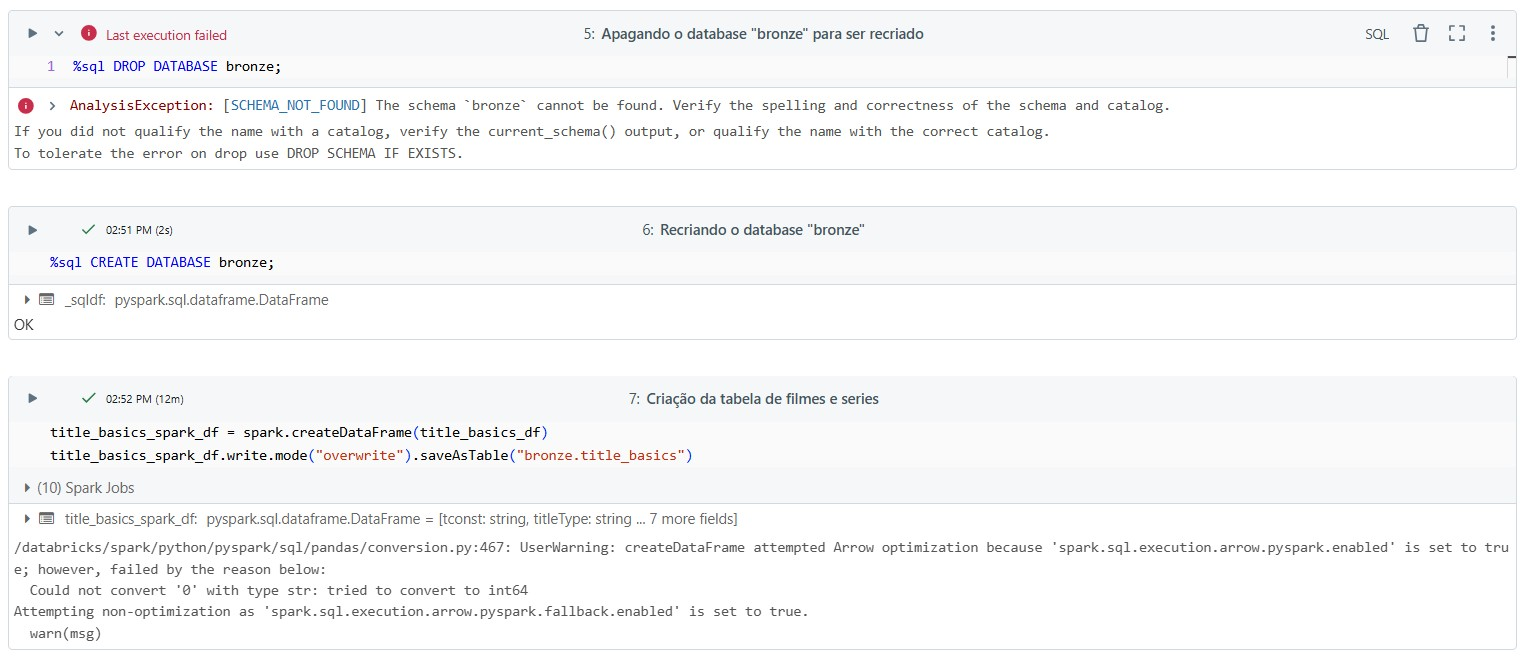

Figura 03 - Criação do conjunto de dados bronze e tabela de filmes/séries.

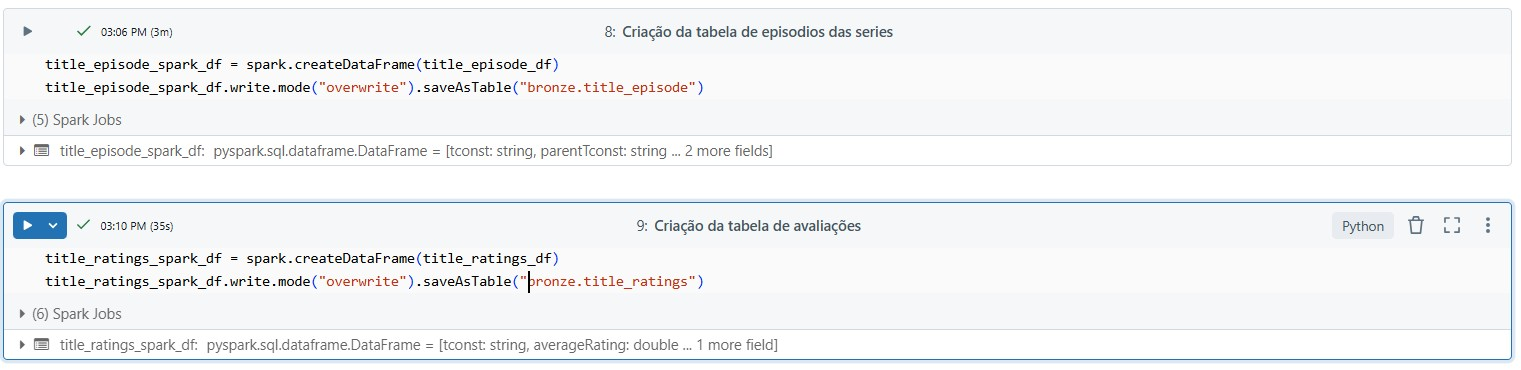

Figura 04 - Criação das tabelas de episódios e ranking.

A seguir verificou-se os dados carregados nas três tabelas.

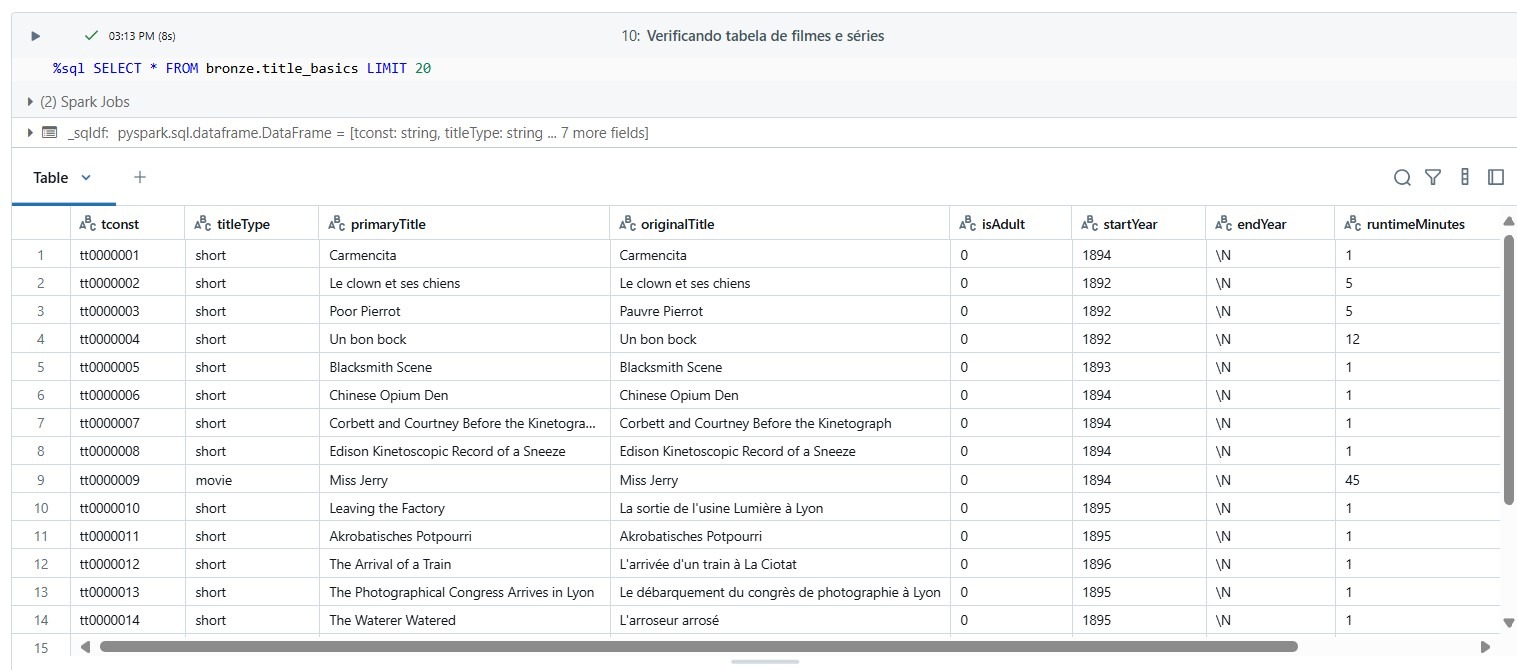

Figura 05 - Tabela bronze de filmes/episódios.

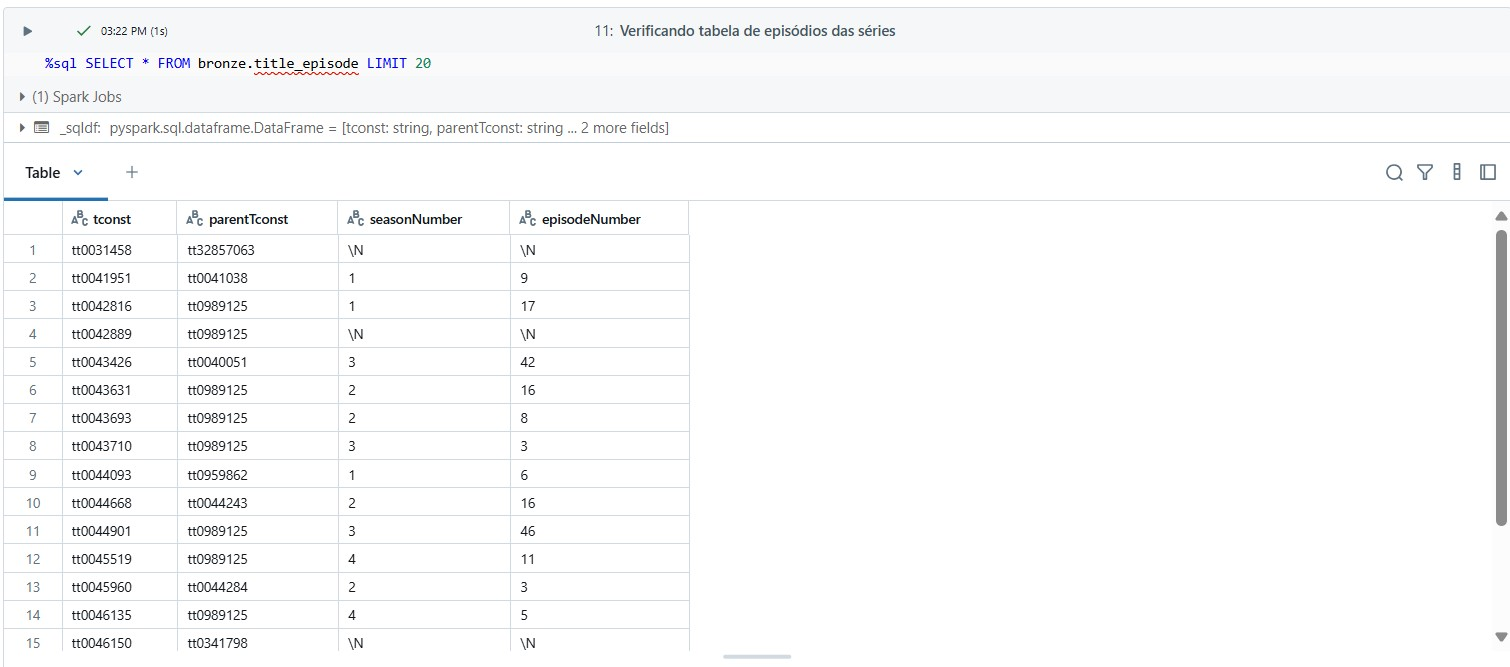

Figura 06 - Tabela bronze de episódios.

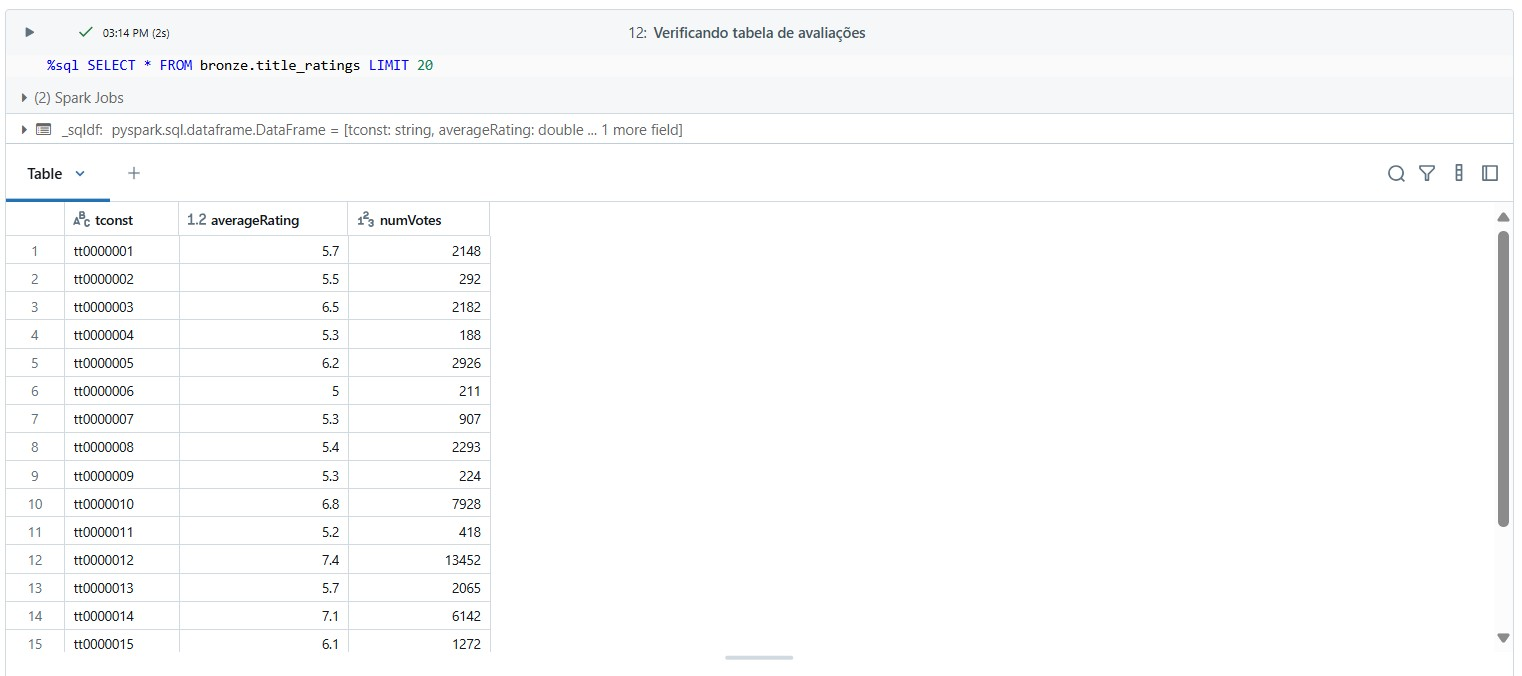

Figura 07 - Tabela bronze de avaliações.

## 3. Análise de Dados

Para a análise e qualidade de dados, focou-se em verificar a consistências dos dados para a verificação das perguntas/objetivos do presente trabalho.

A análise baseia-se no subconjunto de títulos do tipo série, em que destes precisa-se identificar as avaliações correspondentes de forma a obter os *top* classificados conforme diretivas de séria com melhor avaliação com números de classificações acima de 20.000 e classificações de episódios da série *Friends*.

Assim, foram analisadas as consistências dos dados referente à consistência da tabela bronze.title_ratings.

É sabido que para a tabela bronze.title_basics, o campo *isAdult* assume o valor booleano, porém com preenchimentos com valores diferentes de sua restrição. Para o presente trabalho o campo foi considerado de caracteres, não influenciando a análise final.



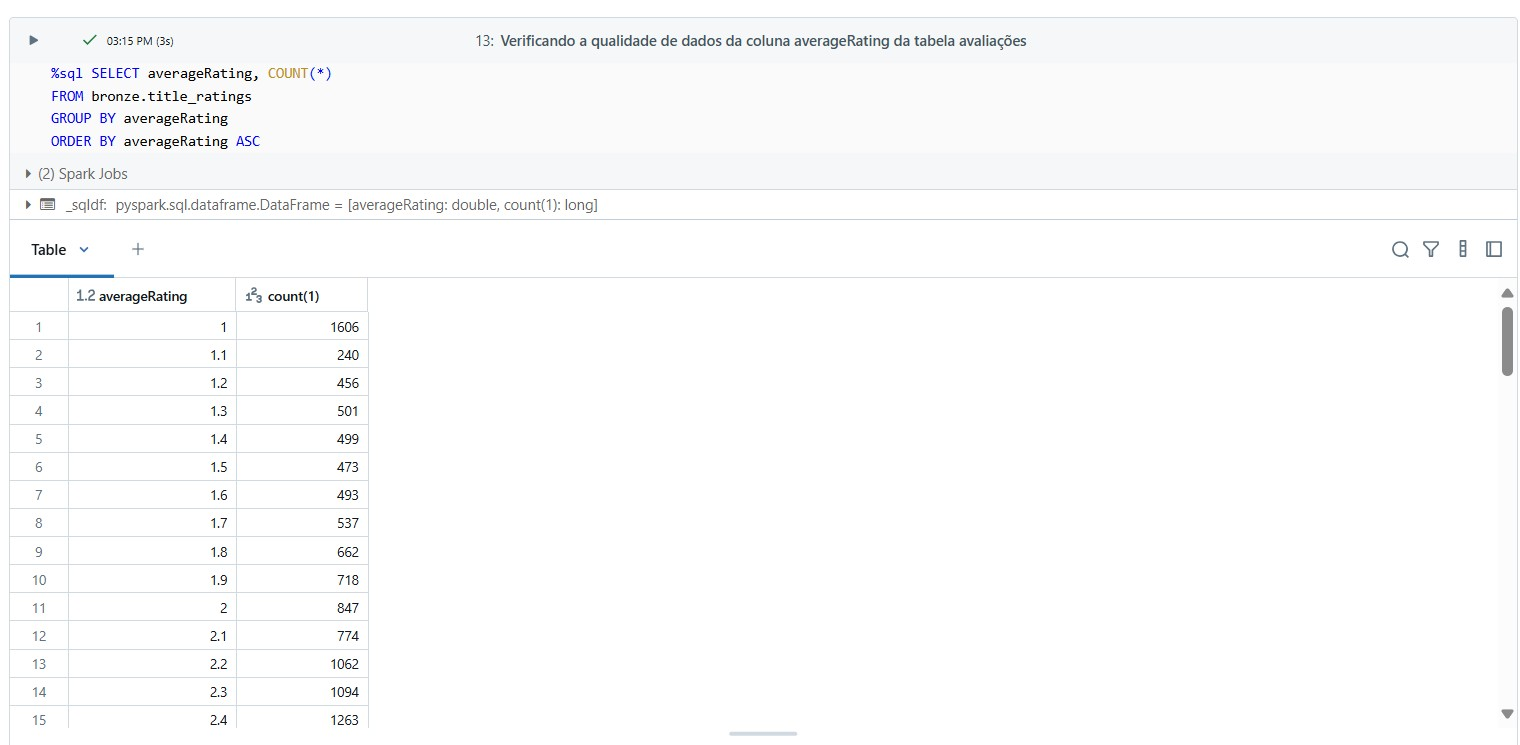

Figura 08 - Integridade da tabela de avaliações.

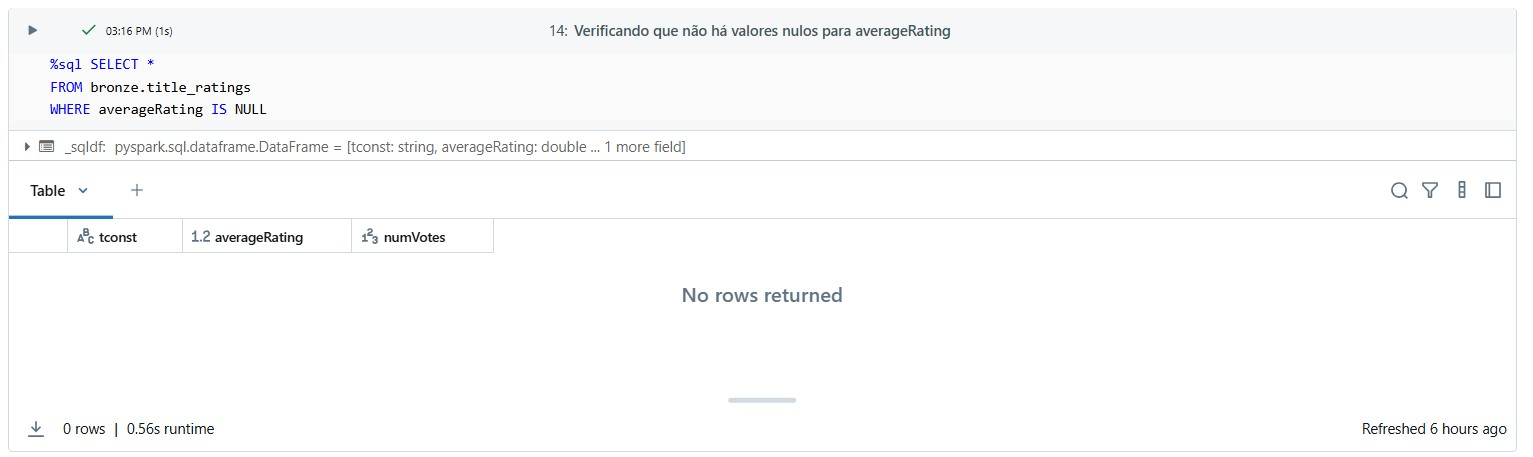

Figura 09 - Verificação de valores nulos na tabela de avaliações.

Não foram encontrados valores nulos que necessitassem de intervenções na tabela de avaliações.

### 4.1. Conjunto de dados *silver*

A partir da avaliação dos dados no conjunto bronze, conforme carga de dados, não se identificou a necessidade de preenchimento/manipulação de dados para os objetivos do presente trabalho.

Utilizou-se a abordagem de a partir do conjunto de dados bronze, segmentá-los no subconjunto silver, tratando assim apenas os dados correspondentes à séries. As séries na tabela bronze.title_basics são classificados confome atributo *titleType* ("tvSeries", "tvMiniSeries", "tvEpisode").

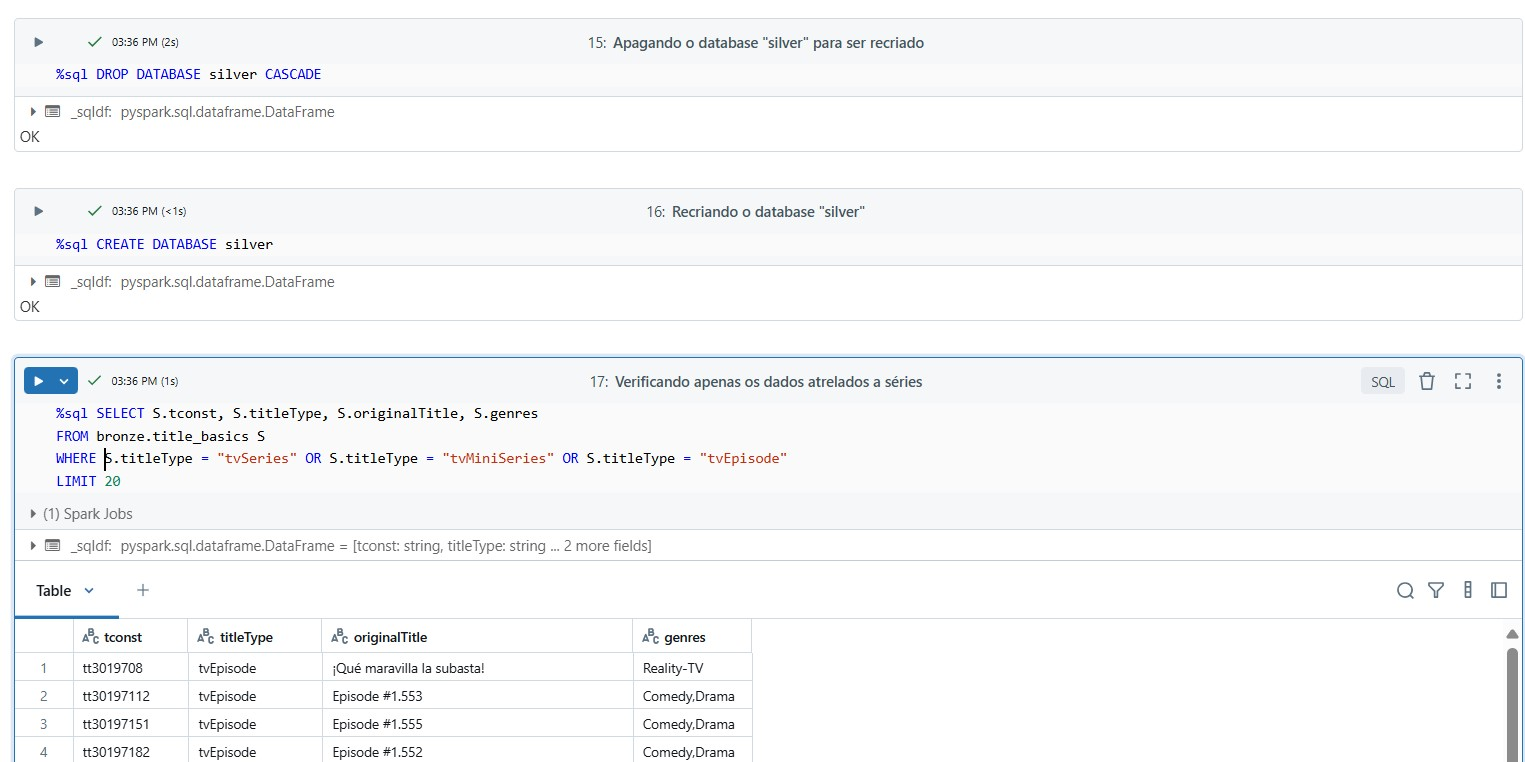

Figura 10 - Criação do conjunto *silver* e verificação de dados apenas atrelados a séries.

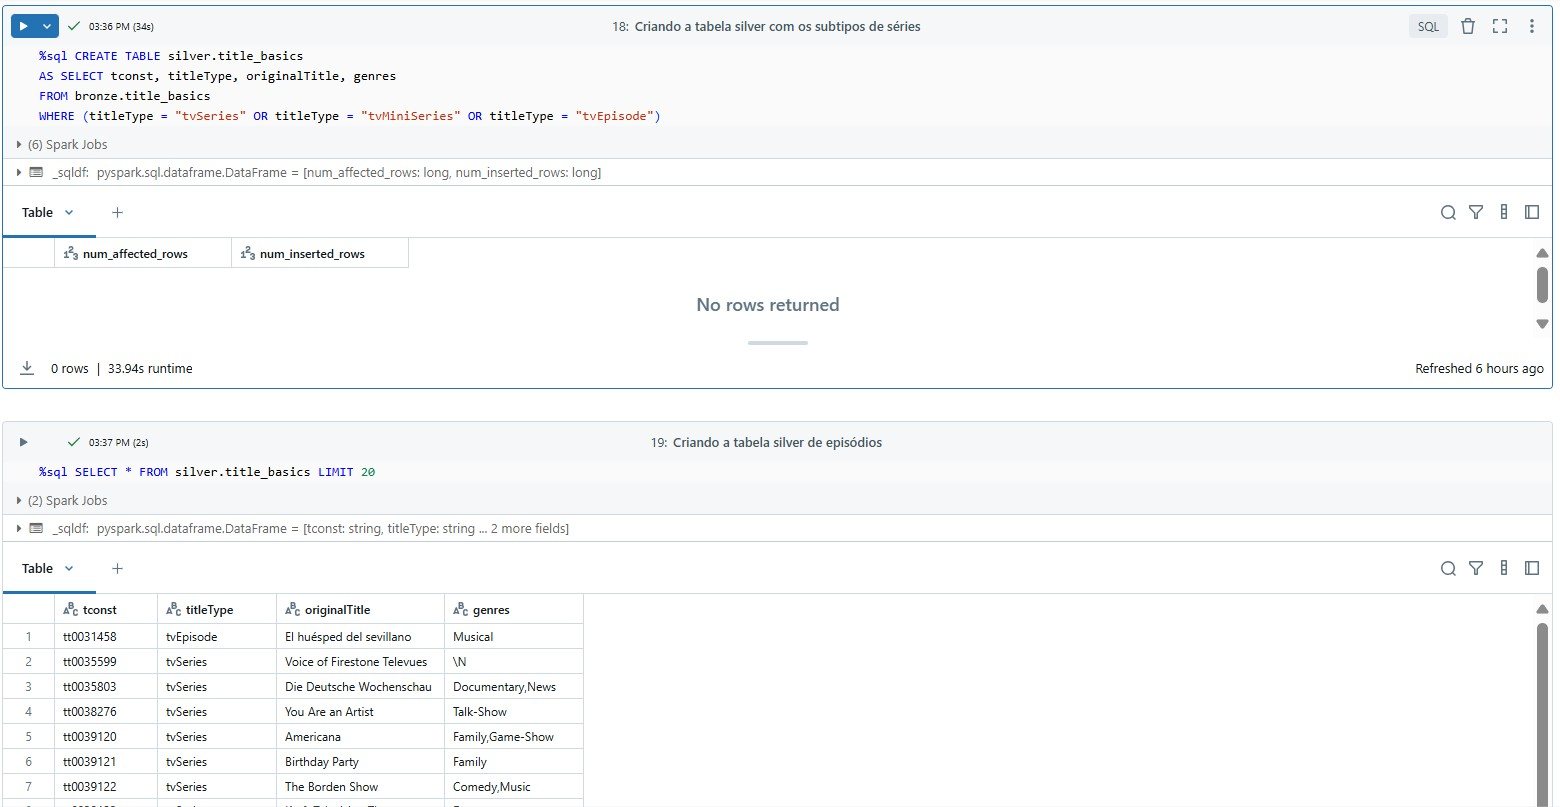

Figura 11 - Criação da tabela *silver* de títulos do tipo séries.

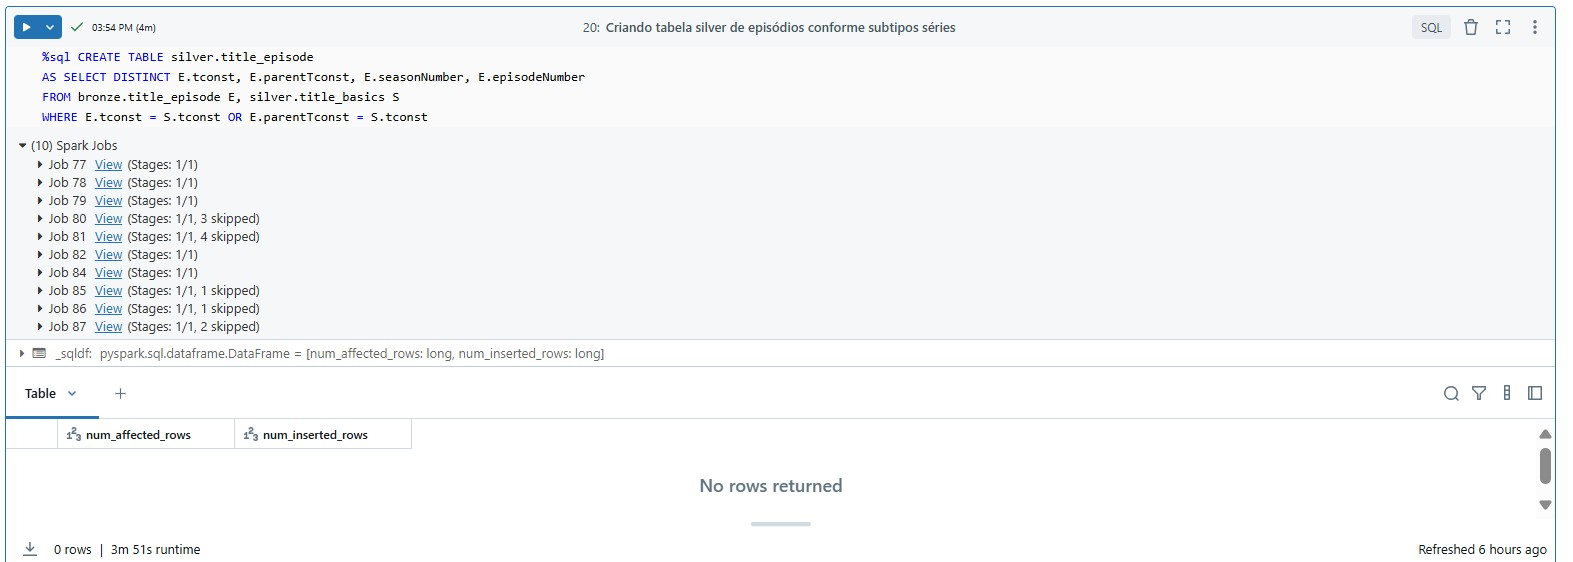




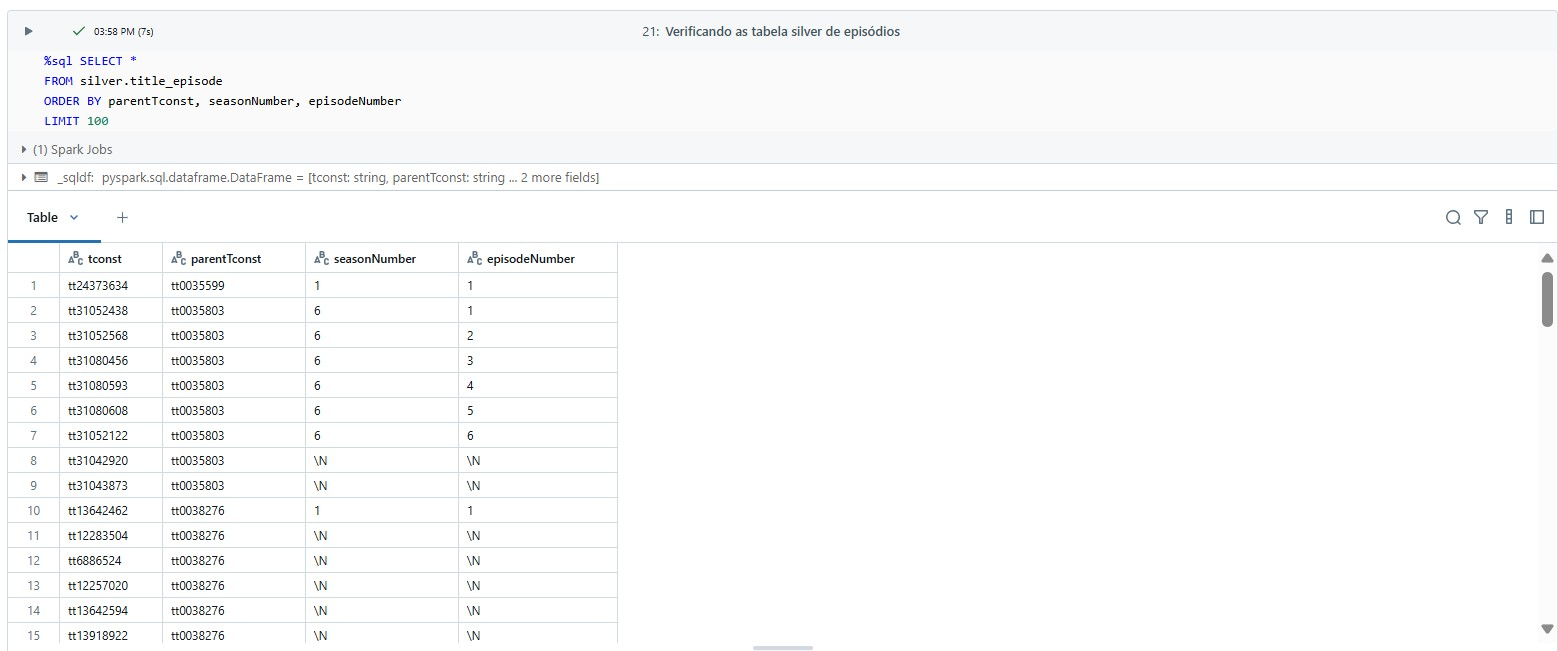

Figura 12 e 13 - Criação e verificação da tablea *silver* de episódios conforme classificação dos subtipos séries.

Por conta da chave estrangeira do título que aponta para um código de títulos, verifica-se a existência do código como título principal e título pai.

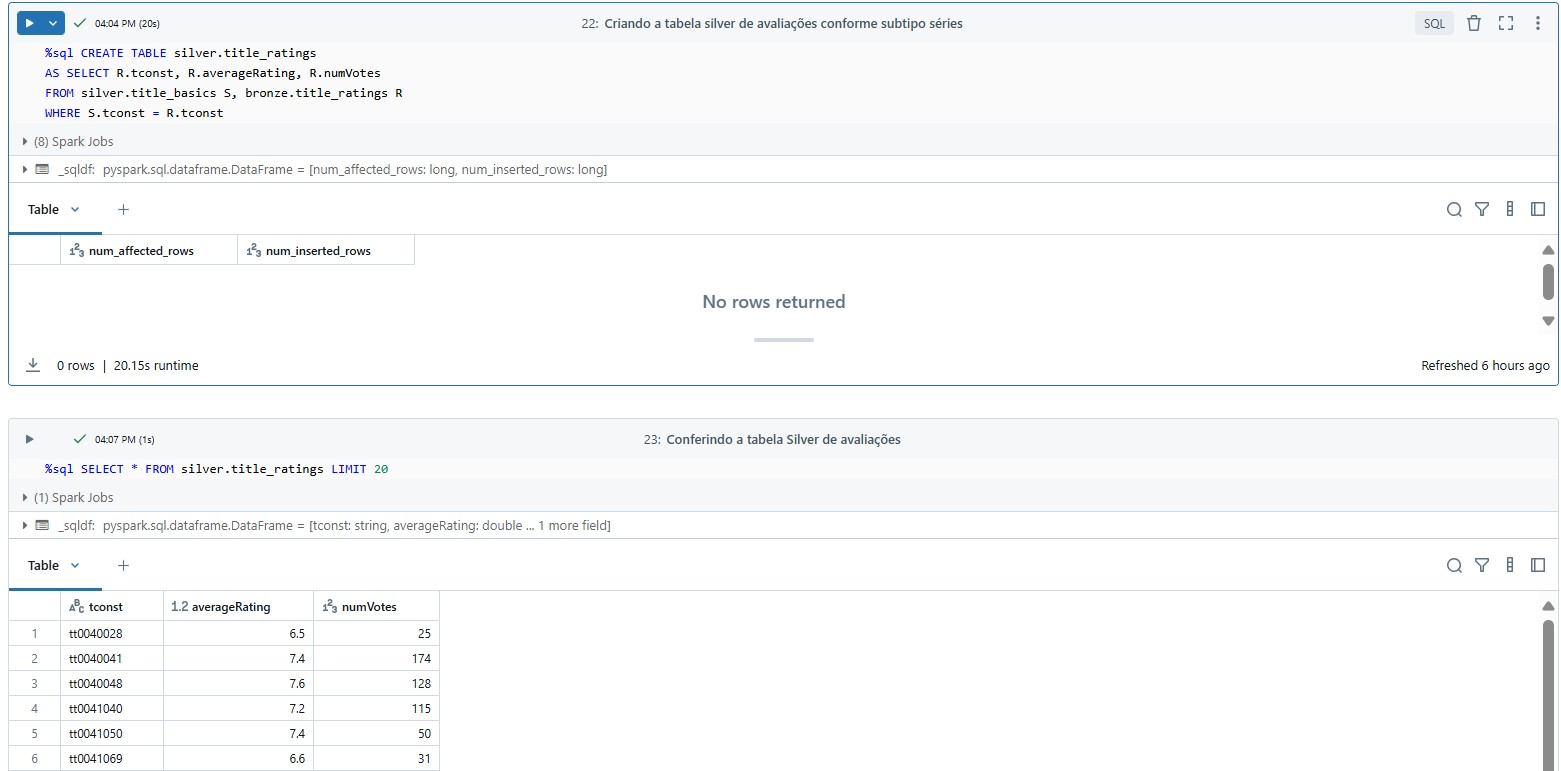

Figura 15 - Criando tabela *silver* de avaliações para os subconjunto série

### 4.2. Conjunto de dados *gold*

A partir do subconjunto de dados silver atribuído a dados de séries, utilizou-se a estratégia de transformar os dados em uma tabela *flat*, incluindo as informações do título dos epísódios, nome da série dos episódios, temporada, capítulo e avaliação desses episódios.

Observa-se que na junção, nem todo episódio de seríe terá uma avaliação, passando o campo correspondente a média da avaliação e número de avaliações a ter o valor nulo nesses casos.

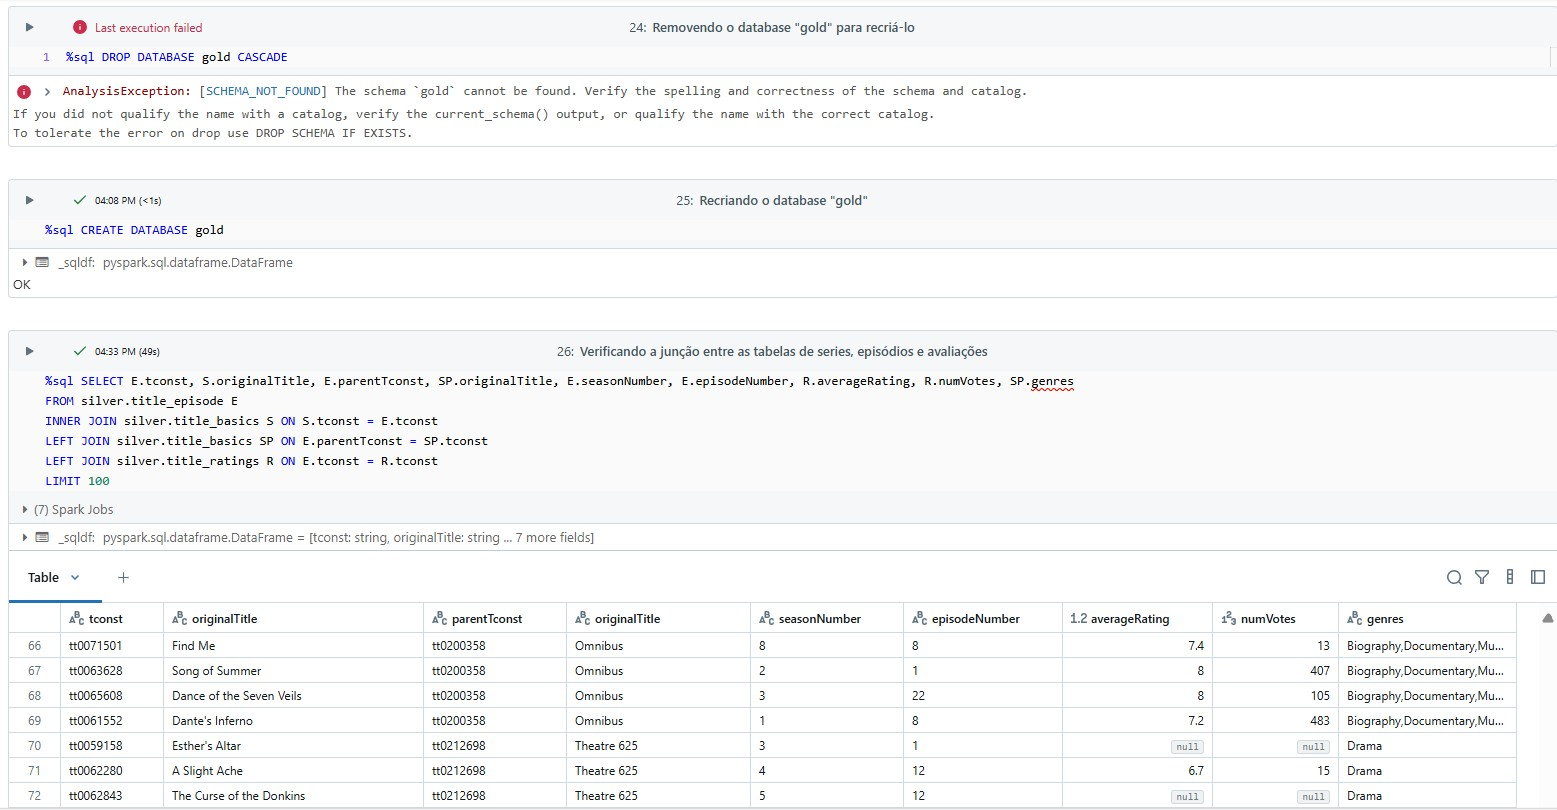

Figura 15 - Criação do conjunto de dados *gold* e verificação de dados tabulados com nome da série, episódio e avaliação.

Para a pesquisa, como o código do título aparece tanto para o episódio quanto para séria, o comando *INNER JOIN* trata a junção dos dados de episódio (nome), com posterior *LEFT JOIN* garantindo a junção para inclusão do nome da série e o gênero da série. O mesmo cruzamento ocorre para incluir a avaliação do episódio da tabela de avaliações.

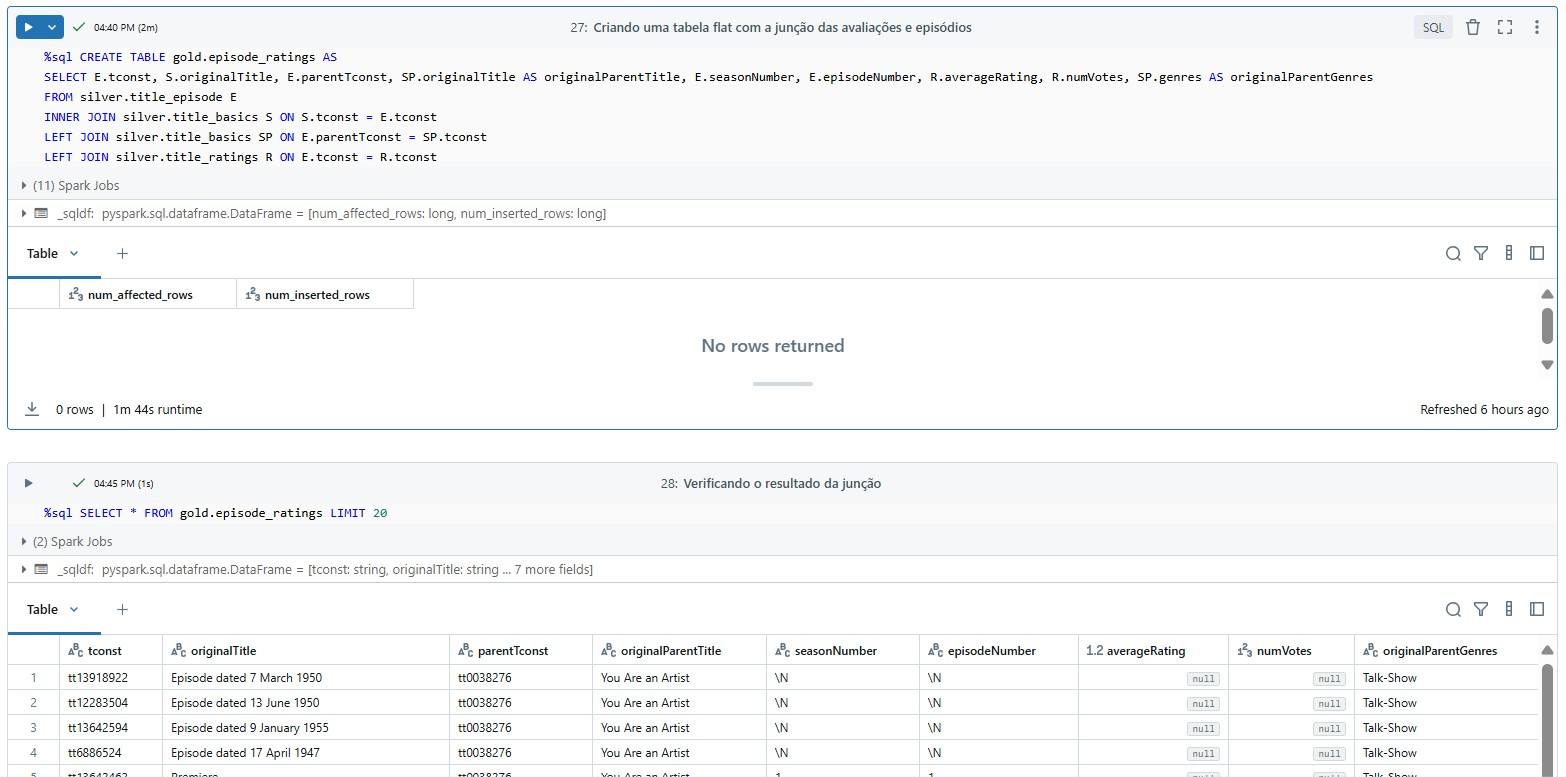

Figura 16 - Criação da tabela *golden* flat estilo *Datalake* unindo os dados de episódios, titulo deste e da série, vem como avaliação do episódio.

Observa-se aqui o efeito de nem todo episódio possuir avaliação, resultando em valores nulos.

## 5. Resultados

Com base na tabela *flat gold*, consultou-se os dados, de forma a obter:

1.   As 25 séries que apresentaram maior avaliação em algum episódio e que possuiram mais de 20.000 votos nessas avaliações.
2.   Para a série de comédia *Friends* de 1994, elencar os 10 melhores episódios conforme avaliação dos usuários. Ou seja, os 10 episódios com melhor avaliação da série.

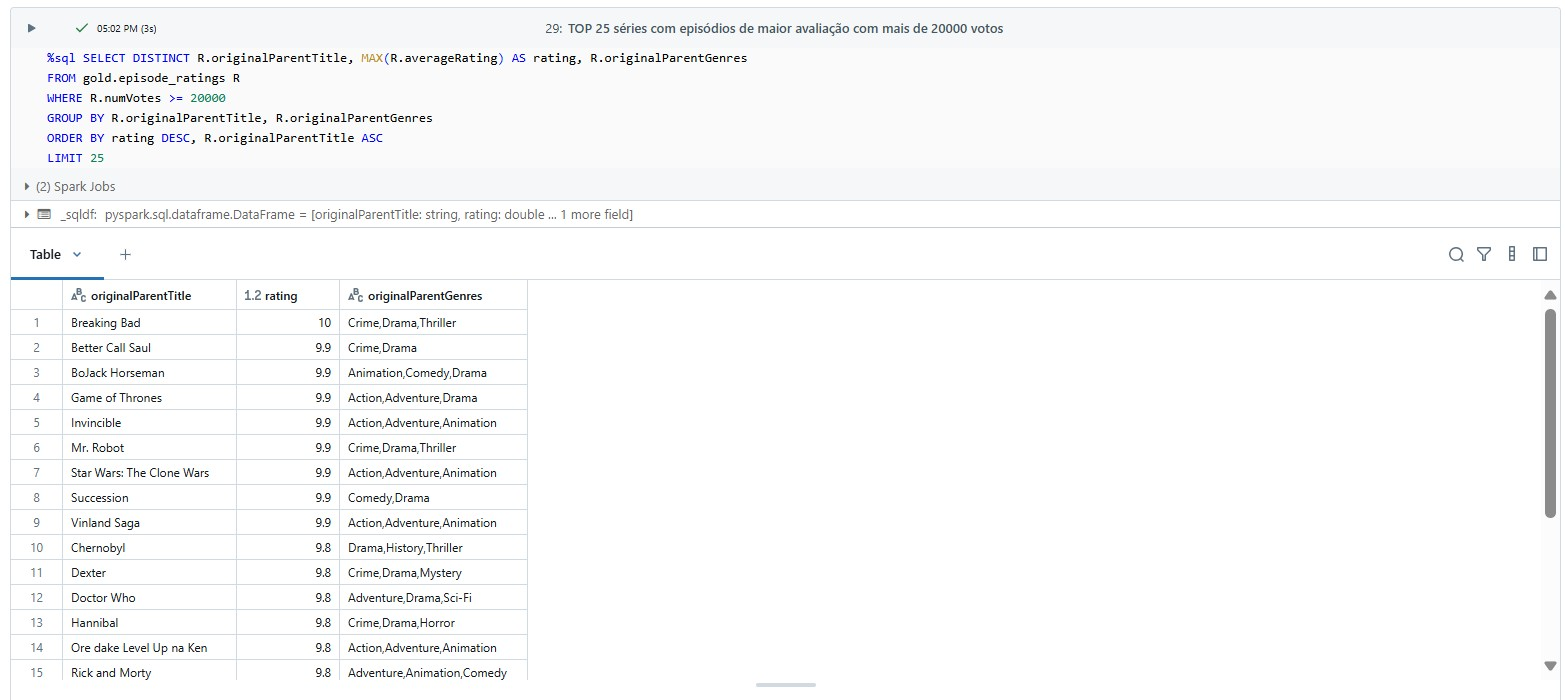

Figura 17 - TOP 25 séries com episódios de maior avaliação e mais de 20 mil votos. Serie Breaking Bad alcançou a primeira posição com média 10 em um de seus episódios.

Para obter o TOP 25, utilizou-se a função MAX sobre o conteúdo da média de avaliação dos episódios, obtendo o agrupamento pelo título da série.

Para o segundo objetivo, de forma a busca ser assertiva por código e não pelo nome da série (há homonimos), fez-se uma consulta inicial do número do título na tabela com posterior consulta do TOP 10 episódios avaliados da série *Friends*.

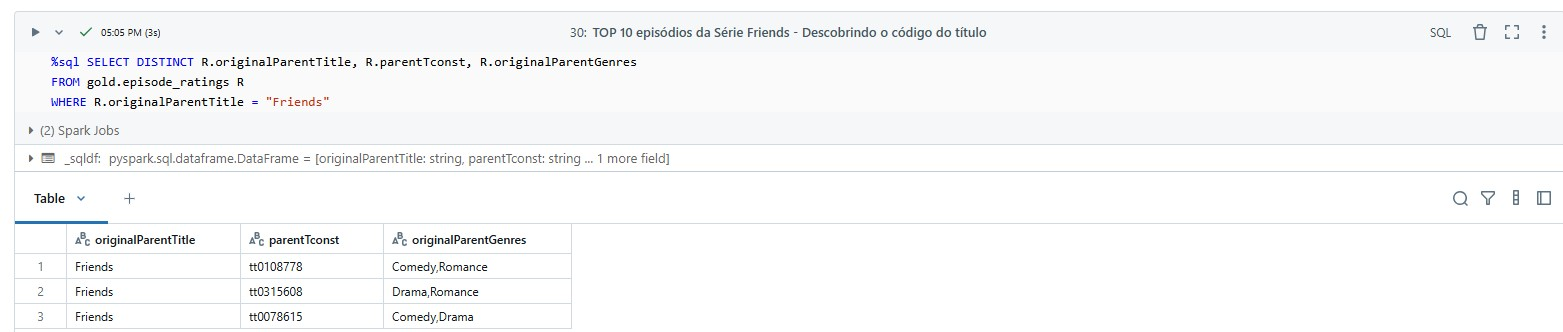

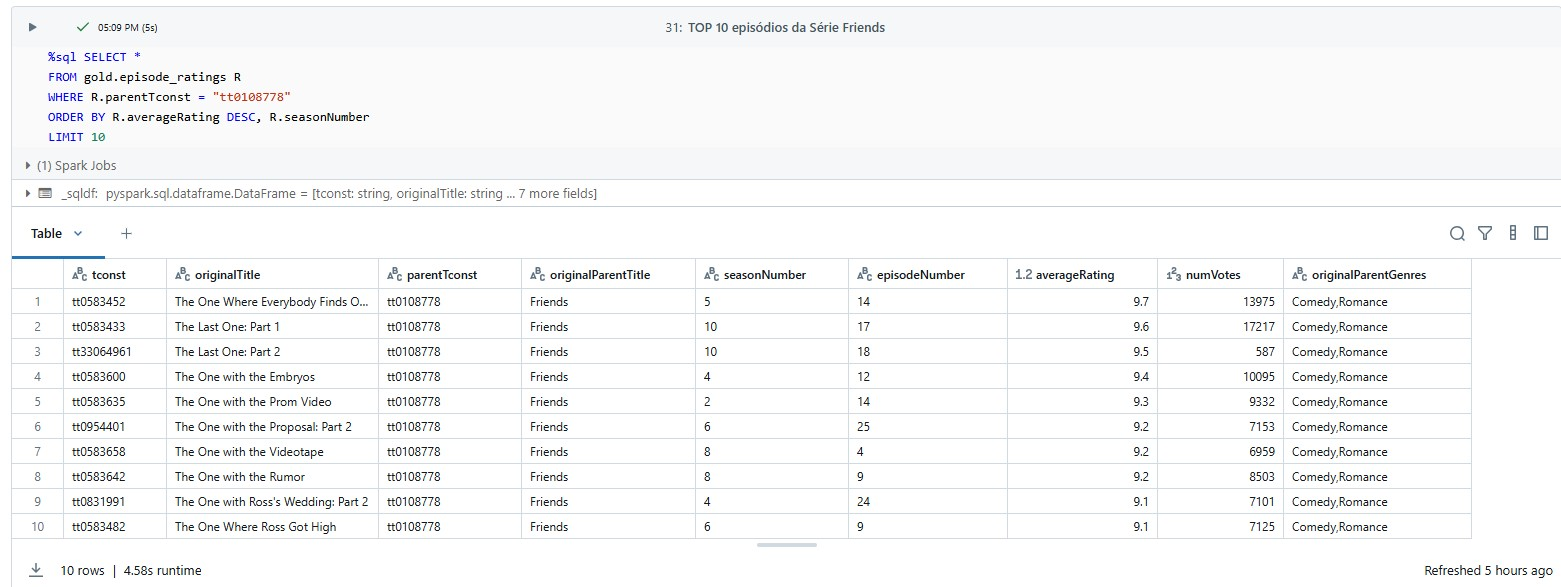

Figuras 18 e 19 - Consulta dos TOP 10 episódios da série *Friends* conforme avaliações no IMDb.

## 6. Conclusão e Autoavaliação

A análise do conjunto de dados utilizando uma ferramenta de *Data Warehouse* em núvem proporcionou a abordagem de tratamento e análise de dados sob um dados massivos.

A abordagem porpocionou, também, tratar os dados e atingir os objetivos e perguntas do problema inicial em determinar as séries mais avaliadas conforme critérios específicos de nome da série e quantidade de avaliações.

No tramento utilizando, verificou-se que para a tabela bronze.title_basics, o campo *isAdult* assume o valor booleano, porém com preenchimentos com valores diferentes de sua restrição. Para o presente trabalho o campo foi considerado de caracteres, não influenciando a análise final.

Durante o trabalho, observou-se que a utlização de manipulação de dados através do SGCD e SQL proporciona uma dinâmica de escalabilidade em volume de dados, abrindo um leque de possibilidades frente ao tratamento de dados. Os mesmos dados podem ser tratados via bibliotecas de Python, porém em trabalhos anteriores percebeu-se uma lentidadão quando utilizado apenas em datasets.

Visto essa percepção, em trabalhos futuros, elenca-se a verificação de escalabilidade, agilidade e tempo de processamento entre o tratamento de dados no SGCD e no data set via Python.